# Mahalanobis Distance

Mhalanobis Distance Between 2 vectors $u$ and $v$ is represented as:

$$
\sqrt{(u - v) \cdot V^{-1} \cdot (u - v)^{T}}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
# function to create a regular hexagon
# this fnction will create a regular hexagon and return a (6, 2) array. it takes in the radius r and 
# center of the hexagon. Also takes in optional rotation
def regular_hexagon(center: np.ndarray, r: float, alpha=0) -> np.ndarray:
    angles = (np.ones(6, ) * alpha + np.arange(6) * (np.pi / 3)).reshape((6, 1))
    return center + r * np.hstack((np.cos(angles), np.sin(angles)))

In [115]:
H1 = regular_hexagon(np.array([0, 0]), 10)

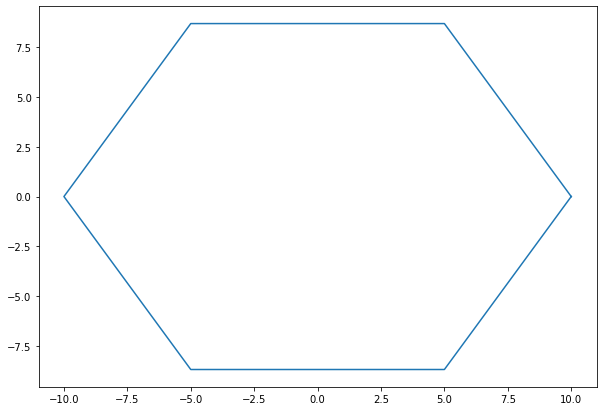

In [116]:
plt.figure(figsize=(10, 7))
X = H1[:, 0].tolist() + [H1[0, 0]]
Y = H1[:, 1].tolist() + [H1[0, 1]]
plt.plot(X, Y)
plt.show()

In [40]:
# we will now create multiple regular hexagons of different sizes and shapes
n = 10
C = np.random.randint(low=-100, high=100, size=(n, 2))
C

array([[ -4,   7],
       [ 55,  21],
       [-17, -13],
       [ 14,  62],
       [ 82,  -2],
       [-12, -98],
       [-88,  85],
       [ 61,  85],
       [-94,  63],
       [-99,  69]])

In [42]:
alpha = np.random.rand(n, 1)
alpha

array([[0.25889368],
       [0.98949428],
       [0.71826414],
       [0.27025251],
       [0.91277774],
       [0.70214657],
       [0.57061331],
       [0.13491131],
       [0.98508523],
       [0.23917819]])

In [43]:
R = np.random.randint(low=0, high=10, size=(n, 1))
R

array([[2],
       [6],
       [7],
       [5],
       [1],
       [6],
       [4],
       [0],
       [1],
       [2]])

In [207]:
A = (np.ones((5, 6)) * alpha) + ((np.pi / 3) * np.arange(6))
A

ValueError: operands could not be broadcast together with shapes (5,6) (10,1) 

In [208]:
alpha * np.ones((5, 6))

ValueError: operands could not be broadcast together with shapes (10,1) (5,6) 

In [188]:
-4 + 2 * np.cos(A)[0, :]

array([-2.0666524, -3.4767507, -5.4100983, -5.9333476, -4.5232493,
       -2.5899017])

In [160]:
C.reshape(n, 2, 1) + R

ValueError: operands could not be broadcast together with shapes (10,2,1) (10,1) 

In [222]:
def random_regular_hexagon(s: int) -> np.ndarray:
    """:returns n regular hexagons randomly created"""
    C = np.random.randint(low=-100, high=100, size=(s, 2))
    R = np.random.randint(low=0, high=20, size=(s, 1))
    alpha = np.random.rand(s, 1)
    A = np.ones((s, 6, )) * alpha + (np.pi / 3) * np.arange(6)
    return C.reshape(s, 2, 1) + (R * (np.stack((np.cos(A), np.sin(A)), axis=1)).reshape(s, 12)).reshape(s, 2, 6)

In [225]:
H = random_regular_hexagon(s=20)

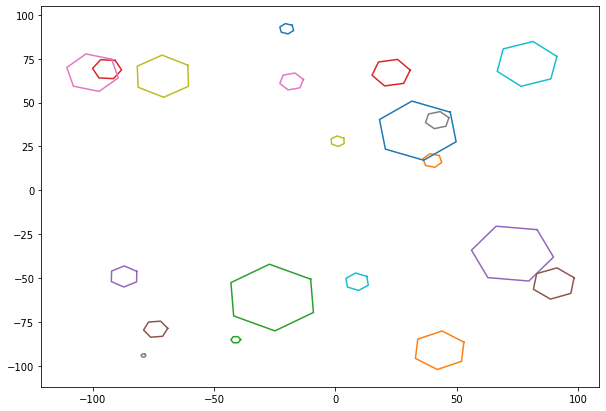

In [226]:
plt.figure(figsize=(10, 7))

n, _, _ = H.shape

for i in range(n):
    X = H[i, 0].tolist() + [H[i, 0, 0]]
    Y = H[i, 1].tolist() + [H[i, 1, 0]]
    plt.plot(X, Y)
    
plt.show()


## Computing Mahalanobis Distance between 2 Hexagons (Regular)

In [236]:
# converting hexagon to vec
def hexagon_2_vec(hexagon: np.ndarray) -> np.ndarray:
    return hexagon.reshape(1, 12)

In [237]:
hexagon_2_vec(H[0])

array([[-17.72656924, -20.55846438, -22.83189514, -22.27343076,
        -19.44153562, -17.16810486,  93.95742499,  94.94756129,
         92.9901363 ,  90.04257501,  89.05243871,  91.0098637 ]])

In [245]:
def mahalanobis(u, v, V):
    V_inv = np.linalg.inv(V)
    diff = u - v
    return float(np.squeeze(np.sqrt(diff.dot(V_inv).dot(diff.T))))

In [239]:
# defining the covariance matrix
V = np.eye(12)
V[V == 0] = 0.5
V

array([[1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. ]])

In [246]:
mahalanobis(hexagon_2_vec(H[0]), hexagon_2_vec(H[1]), V)

330.85729028632977

## Computing Distance Matrix for all Regular Hexagons

In [247]:
n,_, _ = H.shape
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist_matrix[i, j] = mahalanobis(hexagon_2_vec(H[i]), hexagon_2_vec(H[j]), V)

In [250]:
dist_matrix[:3, :3]

array([[  0.        , 330.85729029, 405.16014076],
       [330.85729029,   0.        , 134.91756237],
       [405.16014076, 134.91756237,   0.        ]])

## Creating Non-Regular Hexagons

In [282]:
## Creating Irregular Hexagons
def irregular_hexagon():
    P = np.random.rand(6, 2) * 200 - 100
    P_rest = P[1:, :]
    theta = np.arctan((P_rest[:, 1] - P[0, 1]) / (P_rest[:, 0] - P[0, 0]))
    theta = np.hstack((0, theta))
    Z = np.zeros((6, 3))
    Z[:, 0:2] = P
    Z[:, 2] = theta
    Z = np.array(sorted(Z, key=lambda a_entry: a_entry[2]))
    return Z[:, 0:2]

In [283]:
# creating n irregular Hexagons
n = 5
H = np.zeros((n, 6, 2))
for i in range(n):
    H[i] = irregular_hexagon()

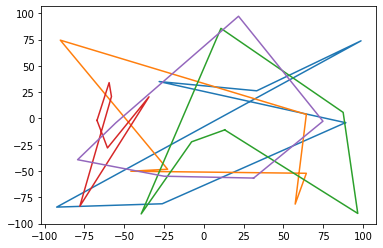

In [296]:
# plotting the irregular hexagons
for i in range(H.shape[0]):
# i = 4
# print(H[i])
    X = H[i, :, 0].tolist() + [H[i, 0, 0]]
    Y = H[i, :, 1].tolist() + [H[i, 0, 1]]
    plt.plot(X, Y)
plt.show()

# Computing Mahalanobis distance between Irregular Hexagons
Making the distance matrix

In [298]:
n, _, _ = H.shape
dist = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist[i, j] = mahalanobis(H[i].reshape(1, 12), H[j].reshape(1, 12), V)
print(dist)

[[  0.         403.77282333 331.68163581 451.63153759 330.4167275 ]
 [403.77282333   0.         488.97527505 393.60039361 427.76368296]
 [331.68163581 488.97527505   0.         426.263981   282.86378522]
 [451.63153759 393.60039361 426.263981     0.         327.37883252]
 [330.4167275  427.76368296 282.86378522 327.37883252   0.        ]]


# Computing Mahalanobis Distance for regular hexagons with same center and $\alpha$ and Different $r$

In [300]:
n = 100
H = np.zeros((n, 6, 2))
for i in range(n):
    H[i] = regular_hexagon(np.array([0, 0]), r=i)

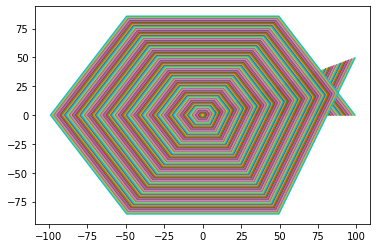

In [301]:
for i in range(H.shape[0]):
    X = H[i, :, 0].tolist() + [H[i, 0, 0]]
    Y = H[i, :, 1].tolist() + [H[i, 1, 0]]
    plt.plot(X, Y)
plt.show()

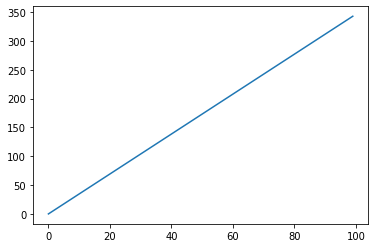

In [302]:
dist = np.zeros(H.shape[0])
for i in range(H.shape[0]):
    dist[i] = mahalanobis(H[0].reshape(1, 12), H[i].reshape(1, 12), V)
plt.plot(dist)
plt.show()